In [59]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [2]:
RANDOM_SEED = 42

In [3]:
path_photos = "C:/Users/Maria/Desktop/CV/Assignment 2/VOCdevkit/VOC2012/JPEGImages/"
path_txt = "C:/Users/Maria/Desktop/CV/Assignment 2/VOCdevkit/VOC2012/ImageSets/Main/"
all_photos = os.listdir(path_photos)
all_txt = os.listdir(path_txt)

In [4]:
print(all_txt)

['aeroplane_train.txt', 'aeroplane_trainval.txt', 'aeroplane_val.txt', 'bicycle_train.txt', 'bicycle_trainval.txt', 'bicycle_val.txt', 'bird_train.txt', 'bird_trainval.txt', 'bird_val.txt', 'boat_train.txt', 'boat_trainval.txt', 'boat_val.txt', 'bottle_train.txt', 'bottle_trainval.txt', 'bottle_val.txt', 'bus_train.txt', 'bus_trainval.txt', 'bus_val.txt', 'car_train.txt', 'car_trainval.txt', 'car_val.txt', 'cat_train.txt', 'cat_trainval.txt', 'cat_val.txt', 'chair_train.txt', 'chair_trainval.txt', 'chair_val.txt', 'cow_train.txt', 'cow_trainval.txt', 'cow_val.txt', 'diningtable_train.txt', 'diningtable_trainval.txt', 'diningtable_val.txt', 'dog_train.txt', 'dog_trainval.txt', 'dog_val.txt', 'horse_train.txt', 'horse_trainval.txt', 'horse_val.txt', 'motorbike_train.txt', 'motorbike_trainval.txt', 'motorbike_val.txt', 'person_train.txt', 'person_trainval.txt', 'person_val.txt', 'pottedplant_train.txt', 'pottedplant_trainval.txt', 'pottedplant_val.txt', 'sheep_train.txt', 'sheep_trainval.

In [5]:
keywords = ("bird", "person", "aeroplane", "sofa")
new_txt = [file_name for file_name in all_txt for key in keywords if key in file_name]
print(new_txt)

['aeroplane_train.txt', 'aeroplane_trainval.txt', 'aeroplane_val.txt', 'bird_train.txt', 'bird_trainval.txt', 'bird_val.txt', 'person_train.txt', 'person_trainval.txt', 'person_val.txt', 'sofa_train.txt', 'sofa_trainval.txt', 'sofa_val.txt']


In [6]:
new_txt_train = [file_name for file_name in new_txt if "trainval" in file_name]
print(new_txt_train)

['aeroplane_trainval.txt', 'bird_trainval.txt', 'person_trainval.txt', 'sofa_trainval.txt']


In [7]:
classes = {}
Data = pd.DataFrame()
for file_name in new_txt_train:
    list_images = []
    with open(path_txt + file_name, "r") as file:
        for line in file:
            l = line.split()
            if l[1] == str(1):
                list_images.append(l[0] + ".jpg")
    classes[file_name[:-4]] = np.array(list_images)
    Data = pd.concat([Data, pd.DataFrame([list_images, [file_name[:-13] for i in list_images]]).T])
    
Data.rename(columns = {0:"Image", 1:"Class"}, inplace = True); Data

,Image,Class
0,2008_000021.jpg,aeroplane
1,2008_000033.jpg,aeroplane
2,2008_000037.jpg,aeroplane
3,2008_000064.jpg,aeroplane
4,2008_000151.jpg,aeroplane
...,...,...
502,2011_003182.jpg,sofa
503,2011_003188.jpg,sofa
504,2011_003201.jpg,sofa
505,2011_003212.jpg,sofa


In [8]:
images_arrays = [cv.imread(path_photos + Data["Image"].iloc[i], cv.IMREAD_COLOR) for i in range(len(Data.index))]
Data["Array"] = images_arrays

In [9]:
Data.head()

,Image,Class,Array
0,2008_000021.jpg,aeroplane,"[[[179, 136, 93], [179, 136, 93], [179, 136, 9..."
1,2008_000033.jpg,aeroplane,"[[[209, 98, 0], [210, 99, 1], [211, 100, 2], [..."
2,2008_000037.jpg,aeroplane,"[[[180, 142, 108], [178, 140, 106], [178, 140,..."
3,2008_000064.jpg,aeroplane,"[[[197, 152, 101], [197, 152, 101], [197, 152,..."
4,2008_000151.jpg,aeroplane,"[[[167, 158, 161], [167, 159, 160], [167, 161,..."


In [10]:
X = pd.DataFrame(Data["Array"])
y = np.array(Data["Class"]).reshape(-1, 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [12]:
X_train.head()

,Array
687,"[[[212, 229, 248], [202, 221, 242], [196, 216,..."
3555,"[[[12, 9, 5], [17, 18, 9], [1, 3, 3], [1, 6, 5..."
156,"[[[57, 50, 71], [66, 51, 78], [54, 49, 70], [4..."
1918,"[[[1, 5, 0], [3, 6, 4], [7, 10, 8], [6, 9, 7],..."
2621,"[[[252, 237, 235], [254, 239, 237], [250, 234,..."


['person']


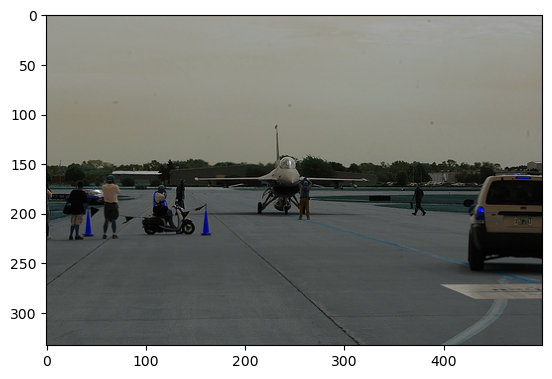

In [13]:
plt.imshow((X_train["Array"].iloc[10]))
print(y_train[10])

## Using ORB

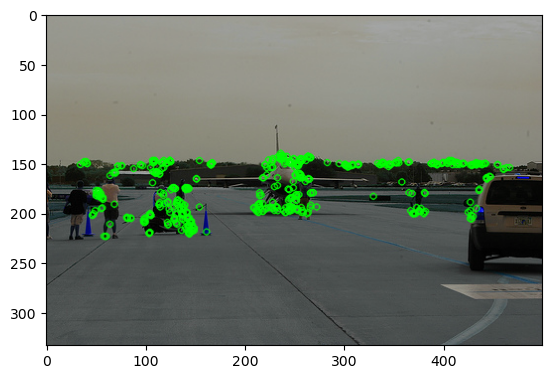

(<matplotlib.image.AxesImage at 0x204d3d33490>, None)

In [14]:
img = X_train["Array"].iloc[10]

orb = cv.ORB_create()
kp = orb.detect(img,None)

img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

In [15]:
import time
t = time.time()
for i, img in enumerate (X_train.values):
    if i%25 == 0: print(i/len(X_train.values))
    
    kp, des = orb.detectAndCompute(img[0], None)

    if i == 0:
        all_des = des
    else:
        if (len(np.shape(des))) > 1:
            all_des = np.vstack([all_des, des])

print(time.time()-t)

0.0
0.005183495749533485
0.01036699149906697
0.015550487248600456
0.02073398299813394
0.025917478747667425
0.031100974497200912
0.036284470246734396
0.04146796599626788
0.04665146174580137
0.05183495749533485
0.05701845324486834
0.062201948994401825
0.0673854447439353
0.07256894049346879
0.07775243624300228
0.08293593199253577
0.08811942774206925
0.09330292349160274
0.09848641924113623
0.1036699149906697
0.10885341074020319
0.11403690648973668
0.11922040223927016
0.12440389798880365
0.12958739373833714
0.1347708894878706
0.1399543852374041
0.14513788098693758
0.15032137673647109
0.15550487248600456
0.16068836823553806
0.16587186398507153
0.171055359734605
0.1762388554841385
0.18142235123367198
0.18660584698320548
0.19178934273273895
0.19697283848227246
0.20215633423180593
0.2073398299813394
0.2125233257308729
0.21770682148040638
0.22289031722993988
0.22807381297947335
0.23325730872900685
0.23844080447854032
0.24362430022807383
0.2488077959776073
0.2539912917271408
0.2591747874766743
0.

In [16]:
n_features = 100
kmeans = KMeans(n_clusters=n_features, random_state=0)
kmeans.fit(all_des)

KMeans(n_clusters=100, random_state=0)

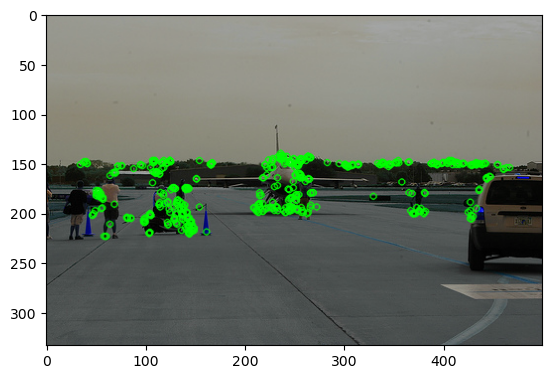

In [18]:
img = X_train["Array"].iloc[10]

kp, des = orb.detectAndCompute(img, None)
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

list_hist = []
for kp in des:
    list_hist.append(int(kmeans.predict(kp.reshape(1, -1))))

In [19]:
hist = np.zeros(n_features)
for i in range(n_features):
    hist[i] = (list_hist.count(i))

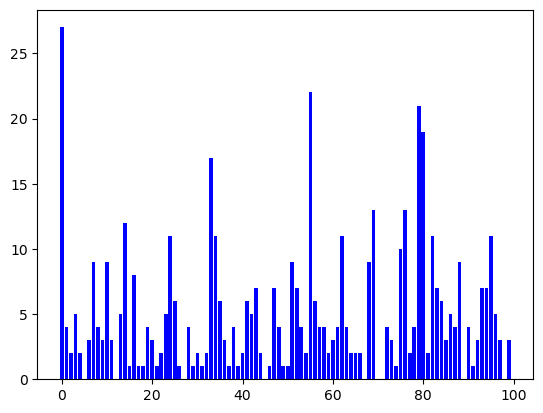

In [20]:
plt.bar(range(n_features), hist, color='b')
plt.show()

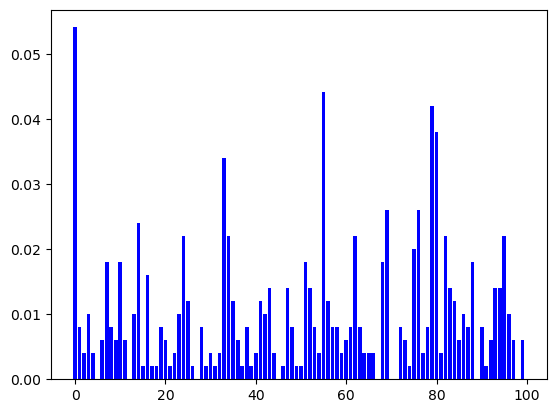

In [21]:
hist = hist/hist.sum()
plt.bar(range(n_features), hist, color='b')
plt.show()

In [27]:
def generate_histogram(img, kmeans, detector):
    kp, des = detector.detectAndCompute(img, None)
    
    list_hist = kmeans.predict(des)
    hist = np.zeros(n_features)
    for i in range(n_features):
        hist[i] = (list_hist==i).sum()
    hist = hist/hist.sum()
    return hist

0.13487768173217773


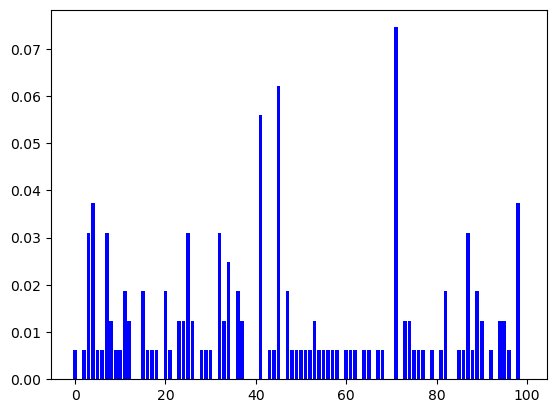

In [57]:
import time
t = time.time()
hist = generate_histogram(images["aeroplane_train"][0], kmeans, orb)
print(time.time()-t)
plt.bar(range(n_features), hist, color='b')
plt.show()

In [89]:
X_train_hist = convert_images(X_train)

0.0
0.00020733982998133942
0.00041467965996267884
0.0006220194899440182
0.0008293593199253577
0.10014513788098693
0.10035247771096828
0.10055981754094961
0.10076715737093096
0.1009744972009123
0.20008293593199253
0.20029027576197386
0.20049761559195522
0.20070495542193656
0.2009122952519179
0.3000207339829981
0.30022807381297945
0.30043541364296084
0.30064275347294217
0.3008500933029235
0.40016587186398506
0.4003732116939664
0.4005805515239477
0.4007878913539291
0.40099523118391045
0.5001036699149907
0.500311009744972
0.5005183495749533
0.5007256894049347
0.500933029234916
0.6000414679659962
0.6002488077959776
0.6004561476259589
0.6006634874559403
0.6008708272859217
0.7001866058469832
0.7003939456769646
0.7006012855069459
0.7008086253369272
0.8001244038979888
0.8003317437279701
0.8005390835579514
0.8007464233879328
0.8009537632179141
0.9000622019489944
0.9002695417789758
0.9004768816089571
0.9006842214389384
0.9008915612689198
Time Generating Histograms: 1671787006.2239327


In [90]:
X_train_hist

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.004090,0.002045,0.018405,0.010225,0.02454,0.053170,0.002045,0.000000,0.010225,0.018405,...,0.016360,0.002045,0.00000,0.002045,0.004090,0.002045,0.006135,0.020450,0.026585,0.022495
0,0.008000,0.000000,0.014000,0.008000,0.00600,0.006000,0.008000,0.006000,0.012000,0.010000,...,0.010000,0.022000,0.01600,0.024000,0.016000,0.016000,0.012000,0.008000,0.000000,0.012000
0,0.006000,0.020000,0.008000,0.008000,0.02000,0.010000,0.002000,0.010000,0.012000,0.002000,...,0.010000,0.026000,0.00600,0.020000,0.016000,0.004000,0.018000,0.010000,0.026000,0.004000
0,0.010000,0.010000,0.020000,0.024000,0.00200,0.010000,0.016000,0.004000,0.004000,0.010000,...,0.018000,0.010000,0.00600,0.014000,0.008000,0.012000,0.014000,0.010000,0.022000,0.012000
0,0.004000,0.016000,0.004000,0.014000,0.01600,0.006000,0.010000,0.004000,0.006000,0.006000,...,0.006000,0.016000,0.00200,0.020000,0.002000,0.008000,0.006000,0.010000,0.012000,0.006000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.008000,0.010000,0.022000,0.000000,0.01200,0.004000,0.002000,0.018000,0.006000,0.006000,...,0.000000,0.018000,0.01000,0.012000,0.008000,0.028000,0.002000,0.012000,0.014000,0.006000
0,0.002000,0.008000,0.012000,0.002000,0.02000,0.022000,0.004000,0.008000,0.014000,0.008000,...,0.006000,0.012000,0.01400,0.008000,0.004000,0.016000,0.014000,0.024000,0.018000,0.018000
0,0.000000,0.008000,0.024000,0.002000,0.00200,0.024000,0.008000,0.008000,0.010000,0.012000,...,0.010000,0.010000,0.01000,0.028000,0.000000,0.002000,0.012000,0.006000,0.000000,0.022000
0,0.006000,0.004000,0.016000,0.004000,0.01800,0.030000,0.000000,0.008000,0.006000,0.022000,...,0.002000,0.008000,0.03400,0.000000,0.000000,0.000000,0.002000,0.012000,0.000000,0.068000


In [102]:
def convert_images(df):
    t = time.time()
    df_hist = pd.DataFrame()
    for i, img in enumerate(df.values):
        if ((i/len(df.values)%0.1) < 0.001): print(i/len(df.values))
        if len(df_hist.values) == 0:
            df_hist = pd.DataFrame(generate_histogram(img[0], kmeans, orb).reshape(1, -1))
        else:
            df_hist = pd.concat((pd.DataFrame(generate_histogram(img[0], kmeans, orb).reshape(1, -1)), df_hist))

    print("Time Generating Histograms:", time.time() - t)
    return df_hist

In [103]:
X_test_hist = convert_images(X_test)

0.0
0.0008291873963515755
0.10033167495854063
0.20066334991708126
0.30016583747927034
0.3009950248756219
0.40049751243781095
0.5008291873963516
0.6003316749585407
0.7006633499170812
0.8001658374792703
0.8009950248756219
0.900497512437811
Time Generating Histograms: 97.64863538742065


In [108]:
t = time.time()
neigh = KNeighborsClassifier(n_neighbors=25)
print("Time training:", time.time()-t)

neigh.fit(X_train_hist, y_train)
print("Time fitting:", time.time()-t)

Time training: 0.0
Time fitting: 0.016703128814697266


C:\Users\Maria\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [109]:
t = time.time()
print("Train Accuracy:", neigh.score(X_train_hist, y_train))
print("Time scoring:", time.time()-t)
print()

t = time.time()
print("Train Accuracy:", neigh.score(X_test_hist, y_test))
print("Time scoring:", time.time()-t)

Train Accuracy: 0.6846361185983828
Time scoring: 0.46079134941101074

Train Accuracy: 0.6517412935323383
Time scoring: 0.16627931594848633


In [95]:
t = time.time()
y_pred = neigh.predict(X_train_hist)
print("Time predicting:", time.time()-t)

cm = confusion_matrix(y_train, y_pred, labels=neigh.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)

Time predicting: 0.32370495796203613


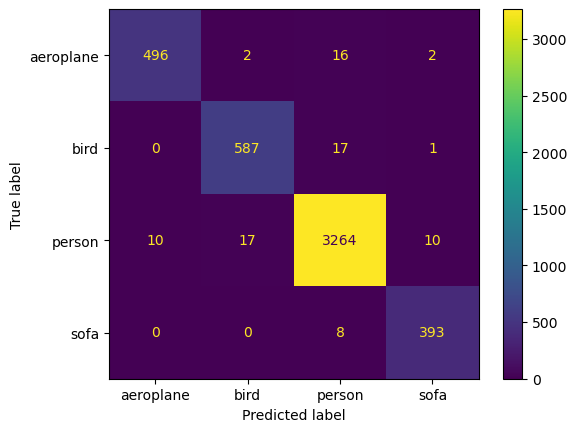

In [96]:
disp.plot()
plt.show()

## SIFT

(39, 128)


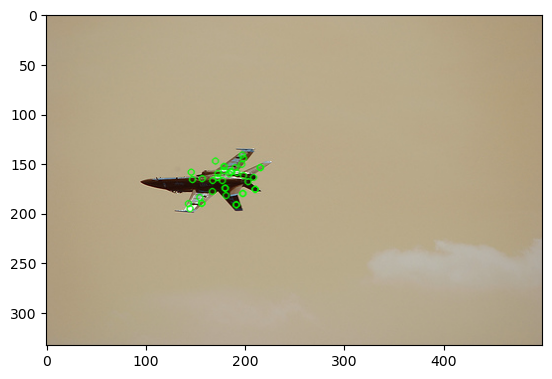

(<matplotlib.image.AxesImage at 0x1e5f5435640>, None)

In [79]:
img = images["aeroplane_train"][0]

sift = cv.SIFT_create()
kp, des = sift.detectAndCompute(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

In [112]:
import time
t = time.time()
timeStacking = 0
for k in images.keys():
    for i in range(len(images[k][:244])):
        sift = cv.SIFT_create()
        kp, des = sift.detectAndCompute(images[k][i],None)
        
        if i == 0:
            all_des = des
        else:
            a = time.time()
            all_des = np.vstack([all_des, des])
            timeStacking += time.time()-a
#             print(des.shape, all_des.shape)
print(time.time()-t, timeStacking)

115.83941125869751 22.19059920310974


In [113]:
all_des[0]

array([ 34.,   2.,   1.,   2.,  14.,   9.,   4.,  15.,  59.,  22.,   6.,
         0.,   0.,   0.,  22.,  60.,  27.,  15.,   2.,   3.,  43.,  34.,
        24.,  54.,   1.,   0.,   0.,  21., 170.,  87.,   2.,   1.,  24.,
        19.,  20.,  13.,   7.,   4.,   2.,  14.,  58.,  75.,  73.,  30.,
         0.,   0.,   0.,   8., 170.,  73.,  15.,   1.,  30.,  42.,   9.,
        29.,  10.,   0.,   0.,   2., 170., 170.,   5.,   7.,   5.,  34.,
        71.,  15.,   1.,   0.,   0.,   0., 108.,  15.,  35.,  31.,   0.,
         0.,   0.,  21., 170.,  20.,   3.,   7.,  32.,   6.,   1.,  26.,
        21.,   3.,   1.,  39., 170.,  31.,   1.,   2.,   2.,   6.,   8.,
         2.,   1.,   0.,   0.,   0.,  26.,   2.,   1.,   0.,   0.,   0.,
         0.,   5.,  60.,   4.,   0.,   1.,   6.,   0.,   0.,   2.,   3.,
         1.,   0.,   8.,  77.,   0.,   0.,   0.], dtype=float32)

In [ ]:
n_features = 100
kmeans = KMeans(n_clusters=n_features, random_state=0)
kmeans.fit(all_des)

In [49]:
list_hist = []
for kp in des:
    list_hist.append(int(kmeans.predict(kp.reshape(1, -1))))

In [50]:
hist = np.zeros(n_features)
for i in range(n_features):
    hist[i] = (list_hist.count(i))

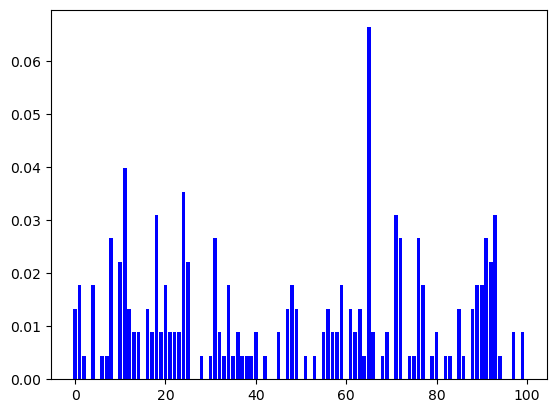

In [52]:
hist = hist/hist.sum()
plt.bar(range(n_features), hist, color='b')
plt.show()

In [53]:
def generate_histogram(img, kmeans, detector):
    kp, des = detector.detectAndCompute(img, None)
    
    list_hist = kmeans.predict(des)
    hist = np.zeros(n_features)
    for i in range(100):
        hist[i] = (list_hist==i).sum()
    hist = hist/hist.sum()
    return hist

In [108]:
sift = cv.SIFT_create()
import time
t = time.time()
hist = generate_histogram(images["aeroplane_train"][0], kmeans, sift)
print(time.time()-t)
plt.bar(range(n_features), hist, color='b')
plt.show()

ValueError: X has 128 features, but KMeans is expecting 32 features as input.

In [55]:
dict_hist = {}
for k in images.keys():
    print("Class", k)
    im = images[k]
    list_hist = np.zeros((len(im), n_features))
    for i in range(len(im)):
        list_hist[i] = generate_histogram(im[i], kmeans, orb)
        if (i%25 == 0):
            print(i/len(im))
    dict_hist[k] = list_hist

Class aeroplane_train


ValueError: X has 32 features, but KMeans is expecting 128 features as input.

In [25]:
Dataframe = pd.DataFrame()
list_keys = list(dict_hist.keys())
y = []
for k in dict_hist.keys():
    h = np.zeros(n_features)
    histograms = dict_hist[k]
    for i, element in enumerate(histograms):
        y.append(list_keys.index(k))
        Dataframe = pd.concat((pd.DataFrame(element.reshape(1, -1)), Dataframe))

In [26]:
Dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.006036,0.008048,0.030181,0.004024,0.006036,0.000000,0.004024,0.012072,0.012072,0.018109,...,0.002012,0.008048,0.032193,0.030181,0.026157,0.022133,0.008048,0.002012,0.000000,0.006036
0,0.010000,0.002000,0.004000,0.012000,0.008000,0.004000,0.024000,0.012000,0.030000,0.010000,...,0.020000,0.014000,0.006000,0.002000,0.006000,0.014000,0.006000,0.018000,0.016000,0.008000
0,0.004000,0.008000,0.002000,0.010000,0.030000,0.014000,0.010000,0.016000,0.016000,0.006000,...,0.008000,0.030000,0.006000,0.006000,0.000000,0.004000,0.012000,0.028000,0.010000,0.014000
0,0.002551,0.017857,0.010204,0.007653,0.012755,0.005102,0.033163,0.002551,0.005102,0.000000,...,0.015306,0.007653,0.005102,0.002551,0.010204,0.012755,0.005102,0.002551,0.022959,0.012755
0,0.006000,0.006000,0.022000,0.014000,0.004000,0.020000,0.008000,0.024000,0.012000,0.014000,...,0.016000,0.024000,0.006000,0.000000,0.000000,0.008000,0.008000,0.018000,0.014000,0.006000


In [28]:
from sklearn.svm import SVC
svm = SVC(class_weight = "balanced")
svm.fit(Dataframe, y)

SVC()

In [29]:
svm.score(Dataframe, y)

0.7147662293979146

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = svm.predict(Dataframe)
cm = confusion_matrix(y, predictions, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)

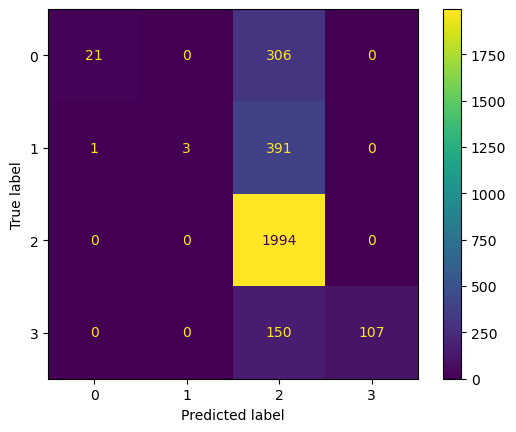

In [31]:
disp.plot()
plt.show()

In [32]:
print(list_keys)

['aeroplane_train', 'bird_train', 'person_train', 'sofa_train']


In [33]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(Dataframe, y)

KNeighborsClassifier(n_neighbors=1)

In [34]:
neigh.score(Dataframe, y)

0.9616548940464178

In [35]:
predictions = neigh.predict(Dataframe)
cm = confusion_matrix(y, predictions, labels=neigh.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)

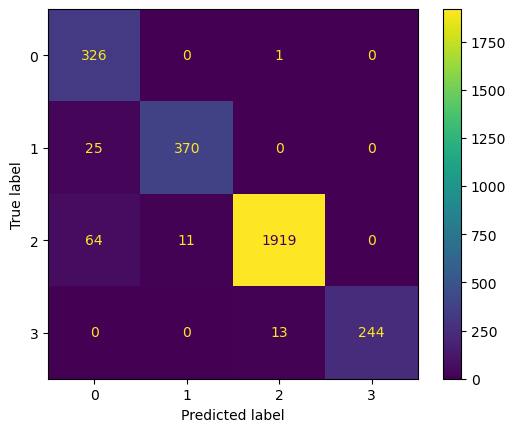

In [36]:
disp.plot()
plt.show()